In [18]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Classifier

In [29]:
path = "results/Classifier/"
rnng_path = "../OpenMind/outputs/"

In [36]:
surp_none_lstm = pd.read_csv(path + 'surprisals_none.tsv', sep='\t', header=0)
surp_none_rnng = pd.read_table(rnng_path + 'surprisals_output_none.txt', header=0)
sent_none = pd.read_table("test_suites/Classifier/cls_none_txt.txt",header=None)
surp_adj_lstm = pd.read_csv(path + 'surprisals_adj.tsv', sep='\t', header=0)
sent_adj = pd.read_table("test_suites/Classifier/cls_adj_txt.txt",header=None)
assert len(surp_none_lstm) == len(surp_none_rnng)

In [111]:
max(surp_none_lstm['sentence_id'])/4

30.0

In [136]:
surp_none_lstm

,sentence_id,token_id,token,surprisal
0,1,1,我,6.978171
1,1,2,很,6.768952
2,1,3,喜欢,4.918214
3,1,4,一,5.979936
4,1,5,位,4.502104
...,...,...,...,...
847,120,2,有,5.617175
848,120,3,一,2.186593
849,120,4,支,5.463740
850,120,5,渔船,12.524443


In [2]:
def surprisal_by_tests(df,columns=4,target=-2):
    total = []
    for suites in range(int(max(df['sentence_id'])/columns)):
        surprisal = []
        for sent in range(1+suites*columns,1+(1+suites)*columns):
            temp = df.loc[df['sentence_id']==sent]
            max_token = temp.token_id.values[-1]
            if target == -2:
                surp_noun = temp.loc[temp['token_id']==max_token].surprisal.values + temp.loc[temp['token_id']==(max_token-1)].surprisal.values
            elif target == -1:
                surp_noun = temp.loc[temp['token_id']==max_token].surprisal.values
            surprisal.append(surp_noun[0])
        total.append(surprisal)
    return total


In [37]:
none_df_lstm = pd.DataFrame(data=surprisal_by_tests(surp_none_lstm),columns=['G1','U1','G2','U2'])
none_df_rnng = pd.DataFrame(data=surprisal_by_tests(surp_none_rnng),columns=['G1','U1','G2','U2'])
adj_df_lstm = pd.DataFrame(data=surprisal_by_tests(surp_adj_lstm),columns=['G1','U1','G2','U2'])

In [38]:
# none
first_noun_lstm = none_df_lstm['U1'] - none_df_lstm['G1'] 
second_noun_lstm = none_df_lstm['U2'] - none_df_lstm['G2'] 
first_class_lstm = none_df_lstm['U2'] - none_df_lstm['G1'] 
second_class_lstm = none_df_lstm['U1'] - none_df_lstm['G2'] 

first_noun_rnng = none_df_rnng['U1'] - none_df_rnng['G1'] 
second_noun_rnng = none_df_rnng['U2'] - none_df_rnng['G2'] 
first_class_rnng = none_df_rnng['U2'] - none_df_rnng['G1'] 
second_class_rnng = none_df_rnng['U1'] - none_df_rnng['G2'] 

# adj
# first_adj_lstm = adj_df_lstm['U1'] - adj_df_lstm['G1'] 
# second_adj_lstm = adj_df_lstm['U2'] - adj_df_lstm['G2'] 
# first_class_lstm = adj_df_lstm['U2'] - adj_df_lstm['G1'] 
# second_class_lstm = adj_df_lstm['U1'] - adj_df_lstm['G2'] 

In [39]:
assert first_adj_lstm.mean() > 0 , "First Noun - Classifier Pair fails a lot"
assert second_adj_lstm.mean() > 0 , "Second Noun - Classifier Pair fails a lot"
assert first_class_lstm.mean() > 0 , "First Classifier - Noun Pair fails a lot"
assert second_class_lstm.mean() > 0 , "Second Classifier - Noun Pair fails a lot"

NameError: name 'first_adj_lstm' is not defined

Text(0.5, 0.98, 'LSTM Classifier - None')

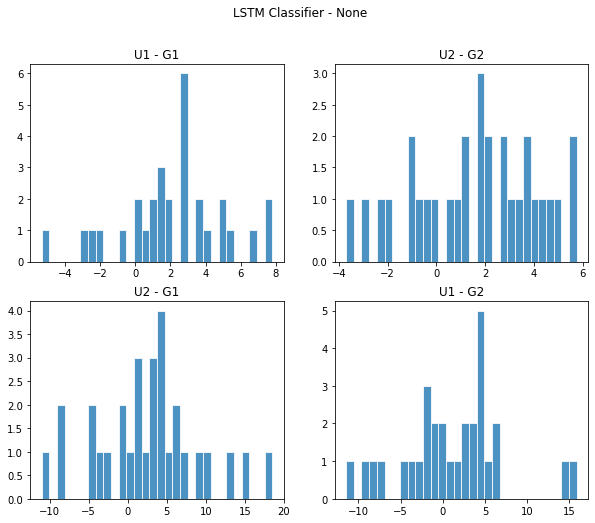

In [41]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(first_noun_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('U1 - G1')
ax[0][1].hist(second_noun_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('U2 - G2')
ax[1][0].hist(first_class_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('U2 - G1')
ax[1][1].hist(second_class_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('U1 - G2')
fig.suptitle('LSTM Classifier - None')

Text(0.5, 0.98, 'RNNG Classifier - None')

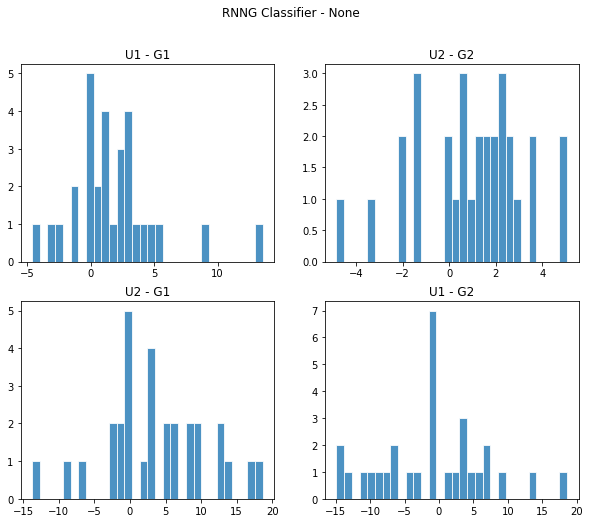

In [42]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(first_noun_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('U1 - G1')
ax[0][1].hist(second_noun_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('U2 - G2')
ax[1][0].hist(first_class_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('U2 - G1')
ax[1][1].hist(second_class_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('U1 - G2')
fig.suptitle('RNNG Classifier - None')

In [108]:
sent_none

,0
0,我 很 喜欢 一 位 明星 。
1,我 很 喜欢 一 首 明星 。
2,我 很 喜欢 一 首 歌曲 。
3,我 很 喜欢 一 位 歌曲 。
4,她 开车 去 了 一 家 店 。
...,...
115,他 很 欣赏 一 处 领导 。
116,那里 有 一 支 舰队 。
117,那里 有 一 艘 舰队 。
118,那里 有 一 艘 渔船 。


In [44]:
for i in range(len(first_noun_lstm)):
    print(i)
    print('1: ', sent_none.loc[i*4].values[0], 'LSTM: ', round(none_df_lstm['G1'].loc[i],3), '; RNNG: ',  round(none_df_rnng['G1'].loc[i],3), 
          '\n2: ', sent_none.loc[1+i*4].values[0], 'LSTM: ', round(none_df_lstm['U1'].loc[i],3), '; RNNG: ',  round(none_df_rnng['U1'].loc[i],3),
          '\n3: ',sent_none.loc[2+i*4].values[0], 'LSTM: ', round(none_df_lstm['G2'].loc[i],3), '; RNNG: ', round(none_df_rnng['G2'].loc[i],3),
          '\n4: ',sent_none.loc[3+i*4].values[0], 'LSTM: ', round(none_df_lstm['U2'].loc[i],3), '; RNNG: ', round(none_df_rnng['U2'].loc[i],3))
    print('2 - 1: ', 'LSTM: ', round(first_noun_lstm[i],3), '; RNNG: ', round(first_noun_rnng[i],3))
    print('4 - 3: ', 'LSTM: ', round(second_noun_lstm[i],3), '; RNNG: ', round(second_noun_rnng[i],3))
    print('4 - 1: ', 'LSTM: ', round(first_class_lstm[i],3),'; RNNG: ', round(first_class_rnng[i],3))
    print('2 - 3: ', 'LSTM: ', round(second_class_lstm[i],3), '; RNNG: ', round(second_class_rnng[i],3))
    print('\n')
    

0
1:  我 很 喜欢 一 位 明星 。 LSTM:  16.537 ; RNNG:  14.707 
2:  我 很 喜欢 一 首 明星 。 LSTM:  19.467 ; RNNG:  18.446 
3:  我 很 喜欢 一 首 歌曲 。 LSTM:  16.786 ; RNNG:  15.416 
4:  我 很 喜欢 一 位 歌曲 。 LSTM:  22.33 ; RNNG:  17.136
2 - 1:  LSTM:  2.93 ; RNNG:  3.739
4 - 3:  LSTM:  5.544 ; RNNG:  1.72
4 - 1:  LSTM:  5.793 ; RNNG:  2.429
2 - 3:  LSTM:  2.681 ; RNNG:  3.03


1
1:  她 开车 去 了 一 家 店 。 LSTM:  15.091 ; RNNG:  10.552 
2:  她 开车 去 了 一 座 店 。 LSTM:  16.435 ; RNNG:  11.898 
3:  她 开车 去 了 一 座 山 。 LSTM:  16.965 ; RNNG:  12.355 
4:  她 开车 去 了 一 家 山 。 LSTM:  19.771 ; RNNG:  13.037
2 - 1:  LSTM:  1.344 ; RNNG:  1.346
4 - 3:  LSTM:  2.806 ; RNNG:  0.682
4 - 1:  LSTM:  4.68 ; RNNG:  2.485
2 - 3:  LSTM:  -0.53 ; RNNG:  -0.458


2
1:  他 有 一 双 手套 。 LSTM:  23.613 ; RNNG:  17.532 
2:  他 有 一 枚 手套 。 LSTM:  21.409 ; RNNG:  17.599 
3:  他 有 一 枚 纽扣 。 LSTM:  20.831 ; RNNG:  22.19 
4:  他 有 一 双 纽扣 。 LSTM:  22.745 ; RNNG:  24.291
2 - 1:  LSTM:  -2.204 ; RNNG:  0.067
4 - 3:  LSTM:  1.914 ; RNNG:  2.1
4 - 1:  LSTM:  -0.868 ; RNNG:  6.75

RNNG seems to perform a bit better than the LSTM when looking at the same noun different classifier comparisons. However, it performs even worse than the LSTM in cross-noun comparisons.

## Missing Object

In [72]:
path = "results/Missing_Object/"
rnng_path = "../OpenMind/outputs/"
surp_none_lstm_mo = pd.read_csv(path + 'surprisals_mobj_none.tsv', sep='\t', header=0)
surp_none_rnng_mo = pd.read_csv(rnng_path + 'surprisals_output_mobj_none.txt', sep='\t',header=0)
sent_none_mo = pd.read_table("test_suites/Missing_Object/mobj_none_txt.txt",header=None)
surp_sub_lstm_mo = pd.read_csv(path + 'surprisals_mobj_sub.tsv', sep='\t', header=0)
surp_sub_rnng_mo = pd.read_csv(rnng_path + 'surprisals_output_mobj_sub.txt',sep='\t',header=0)
sent_sub_mo = pd.read_table("test_suites/Missing_Object/mobj_sub_txt.txt",header=None)

In [73]:
none_df_lstm_mo = pd.DataFrame(data=surprisal_by_tests(surp_none_lstm_mo,columns=2,target=-1),columns=['U','G'])
none_df_rnng_mo = pd.DataFrame(data=surprisal_by_tests(surp_none_rnng_mo,columns=2,target=-1),columns=['U','G'])
sub_df_lstm_mo = pd.DataFrame(data=surprisal_by_tests(surp_sub_lstm_mo,columns=2,target=-1),columns=['U','G'])
sub_df_rnng_mo = pd.DataFrame(data=surprisal_by_tests(surp_sub_rnng_mo,columns=2,target=-1),columns=['U','G'])

In [74]:
diff_mobj_none = none_df_lstm_mo['U'] - none_df_lstm_mo['G'] 
diff_mobj_sub = sub_df_lstm_mo['U'] - sub_df_lstm_mo['G'] 
print('LSTM None: ', np.mean(diff_mobj_none),'; Sub: ',np.mean(diff_mobj_sub))

LSTM None:  3.23858807367437 ; Sub:  1.919205763760735


In [75]:
diff_mobj_none_rnng = none_df_rnng_mo['U'] - none_df_rnng_mo['G'] 
diff_mobj_sub_rnng = sub_df_rnng_mo['U'] - sub_df_rnng_mo['G'] 
print('RNNG None: ', np.mean(diff_mobj_none_rnng),'; Sub: ',np.mean(diff_mobj_sub_rnng))

RNNG None:  4.664995294117647 ; Sub:  4.7266028823529425


Text(0.5, 0.98, 'Missing Object')

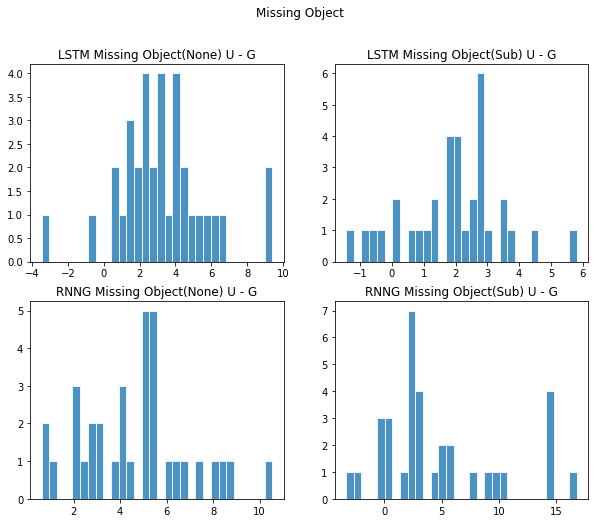

In [76]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(diff_mobj_none,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('LSTM Missing Object(None) U - G')
ax[0][1].hist(diff_mobj_sub,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('LSTM Missing Object(Sub) U - G')
ax[1][0].hist(diff_mobj_none_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('RNNG Missing Object(None) U - G')
ax[1][1].hist(diff_mobj_sub_rnng,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('RNNG Missing Object(Sub) U - G')
fig.suptitle('Missing Object')

In [77]:
for i in range(len(diff_mobj)):
    print(i)
    print('1: ', sent_none_mo.loc[i*2].values[0], 'LSTM: ',round(none_df_lstm_mo['U'].loc[i],3),'; RNNG:',round(none_df_rnng_mo['U'].loc[i],3),
          '\n2: ', sent_none_mo.loc[1+i*2].values[0],'LSTM: ', round(none_df_lstm_mo['G'].loc[i],3),'; RNNG:',round(none_df_rnng_mo['G'].loc[i],3))
    print('U - G: ', 'LSTM: ', round(diff_mobj_none[i],3),'; RNNG: ', round(diff_mobj_none_rnng[i],3))
    print('\n')

0
1:  记者 采访 了 。 LSTM:  3.444 ; RNNG: 11.928 
2:  记者 采访 了 科学家 。 LSTM:  6.915 ; RNNG: 1.382
U - G:  LSTM:  -3.471 ; RNNG:  10.546


1
1:  他 拿出 了 。 LSTM:  8.821 ; RNNG: 15.773 
2:  他 拿出 了 篮子 。 LSTM:  8.18 ; RNNG: 7.306
U - G:  LSTM:  0.641 ; RNNG:  8.467


2
1:  他 认识 了 。 LSTM:  7.358 ; RNNG: 10.378 
2:  他 认识 了 老师 。 LSTM:  4.284 ; RNNG: 3.775
U - G:  LSTM:  3.074 ; RNNG:  6.603


3
1:  他 拍 下 了 。 LSTM:  7.493 ; RNNG: 4.844 
2:  他 拍 下 了 艺术品 。 LSTM:  4.979 ; RNNG: 3.552
U - G:  LSTM:  2.514 ; RNNG:  1.292


4
1:  我们 参加 了 。 LSTM:  8.314 ; RNNG: 9.818 
2:  我们 参加 了 活动 。 LSTM:  2.221 ; RNNG: 1.026
U - G:  LSTM:  6.094 ; RNNG:  8.792


5
1:  他 想起 了 。 LSTM:  10.207 ; RNNG: 10.812 
2:  他 想起 了 同学 。 LSTM:  5.259 ; RNNG: 5.726
U - G:  LSTM:  4.949 ; RNNG:  5.087


6
1:  司机 启动 了 。 LSTM:  3.668 ; RNNG: 6.981 
2:  司机 启动 了 车 。 LSTM:  4.291 ; RNNG: 3.228
U - G:  LSTM:  -0.623 ; RNNG:  3.752


7
1:  爸爸 买 了 。 LSTM:  6.997 ; RNNG: 4.883 
2:  爸爸 买 了 房子 。 LSTM:  4.794 ; RNNG: 2.356
U - G:  LSTM:  2.203 ; RNNG:  

Both LSTM and RNNG work better than in the Classifier case. On top of that, RNNG works extremely better with all positive results as expected.

In [78]:
for i in range(len(diff_mobj)):
    print(i)
    print('1: ', sent_sub_mo.loc[i*2].values[0], 'LSTM: ',round(sub_df_lstm_mo['U'].loc[i],3),'; RNNG:',round(sub_df_rnng_mo['U'].loc[i],3),
          '\n2: ', sent_sub_mo.loc[1+i*2].values[0],'LSTM: ', round(sub_df_lstm_mo['G'].loc[i],3),'; RNNG:',round(sub_df_rnng_mo['G'].loc[i],3))
    print('U - G: ', 'LSTM: ', round(diff_mobj_sub[i],3),'; RNNG: ', round(diff_mobj_sub_rnng[i],3))
    print('\n')

0
1:  记者 采访 了 研发 产品 。 LSTM:  4.952 ; RNNG: 3.258 
2:  记者 采访 了 研发 产品 的 科学家 。 LSTM:  4.069 ; RNNG: 0.644
U - G:  LSTM:  0.883 ; RNNG:  2.613


1
1:  他 拿出 了 有 苹果 。 LSTM:  9.398 ; RNNG: 15.068 
2:  他 拿出 了 有 苹果 的 篮子 。 LSTM:  6.525 ; RNNG: 11.77
U - G:  LSTM:  2.873 ; RNNG:  3.298


2
1:  他 认识 了 写 书 。 LSTM:  5.857 ; RNNG: 9.67 
2:  他 认识 了 写 书 的 老师 。 LSTM:  4.146 ; RNNG: 1.995
U - G:  LSTM:  1.711 ; RNNG:  7.675


3
1:  他 拍 下 了 获得 大奖 。 LSTM:  3.444 ; RNNG: 0.313 
2:  他 拍 下 了 获得 大奖 的 艺术品 。 LSTM:  3.861 ; RNNG: 0.236
U - G:  LSTM:  -0.417 ; RNNG:  0.077


4
1:  我们 参加 了 吸引 学生 。 LSTM:  5.49 ; RNNG: 15.464 
2:  我们 参加 了 吸引 学生 的 活动 。 LSTM:  2.532 ; RNNG: 0.899
U - G:  LSTM:  2.958 ; RNNG:  14.565


5
1:  他 想起 了 写 过 歌 。 LSTM:  6.072 ; RNNG: 4.228 
2:  他 想起 了 写 过 歌 的 同学 。 LSTM:  2.585 ; RNNG: 2.002
U - G:  LSTM:  3.487 ; RNNG:  2.225


6
1:  司机 启动 了 装有 音响 。 LSTM:  8.866 ; RNNG: 20.093 
2:  司机 启动 了 装有 音响 的 车 。 LSTM:  3.057 ; RNNG: 3.281
U - G:  LSTM:  5.809 ; RNNG:  16.812


7
1:  爸爸 买 了 有 家具 。 LSTM:  

Both the RNNG and LSTM model's performances suffer a bit when a subject extracted clause is embedded after the main verb. For test suites that RNNG produces negative diff, maybe double-check if the sub-clause makes sense with the selected noun?

In [133]:
for i in range(len(first_adj_lstm)):
    print(i)
    print('1: ', sent_adj.loc[i*4].values[0], round(adj_df_lstm['G1'].loc[i],3),  '\n2: ', sent_adj.loc[1+i*4].values[0], round(adj_df_lstm['U1'].loc[i],3), '\n3: ',sent_adj.loc[2+i*4].values[0], 
          round(adj_df_lstm['G2'].loc[i],3), '\n4: ',sent_adj.loc[3+i*4].values[0], round(adj_df_lstm['U2'].loc[i],3))
    print('2 - 1: ', round(first_adj_lstm[i],3))
    print('4 - 3: ', round(second_adj_lstm[i],3))
    print('4 - 1: ', round(lstm[i],3))
    print('2 - 3: ', round(second_class_lstm[i],3))
    print('\n')

0
1:  我 很 喜欢 一 位 国内 的 明星 。 14.229 
2:  我 很 喜欢 一 首 国内 的 明星 。 14.754 
3:  我 很 喜欢 一 首 国内 的 歌曲 。 20.052 
4:  我 很 喜欢 一 位 国内 的 歌曲 。 21.548
2 - 1:  0.525
4 - 3:  1.496
4 - 1:  7.319
2 - 3:  -5.297


1
1:  她 开车 去 了 一 家 郊外 的 店 。 16.248 
2:  她 开车 去 了 一 座 郊外 的 店 。 16.226 
3:  她 开车 去 了 一 座 郊外 的 山 。 17.669 
4:  她 开车 去 了 一 家 郊外 的 山 。 17.896
2 - 1:  -0.022
4 - 3:  0.227
4 - 1:  1.648
2 - 3:  -1.443


2
1:  他 有 一 双 蓝色 的 手套 。 23.35 
2:  他 有 一 枚 蓝色 的 手套 。 21.792 
3:  他 有 一 枚 蓝色 的 纽扣 。 25.249 
4:  他 有 一 双 蓝色 的 纽扣 。 24.954
2 - 1:  -1.559
4 - 3:  -0.294
4 - 1:  1.604
2 - 3:  -3.457


3
1:  店长 拿 着 一 只 便宜 的 兔子 。 27.101 
2:  店长 拿 着 一 根 便宜 的 兔子 。 26.597 
3:  店长 拿 着 一 根 便宜 的 萝卜 。 26.192 
4:  店长 拿 着 一 只 便宜 的 萝卜 。 28.228
2 - 1:  -0.503
4 - 3:  2.037
4 - 1:  1.128
2 - 3:  0.406


4
1:  他 认识 了 一 名 幸运 的 男孩 。 16.713 
2:  他 认识 了 一 本 幸运 的 男孩 。 18.772 
3:  他 认识 了 一 本 幸运 的 小说 。 13.094 
4:  他 认识 了 一 名 幸运 的 小说 。 11.677
2 - 1:  2.06
4 - 3:  -1.418
4 - 1:  -5.036
2 - 3:  5.678


5
1:  男人 在 扫描 一 篇 很 短 的 文章 。 11.029 
2:  男人 在 

Text(0.5, 1.0, 'U1 - G2')

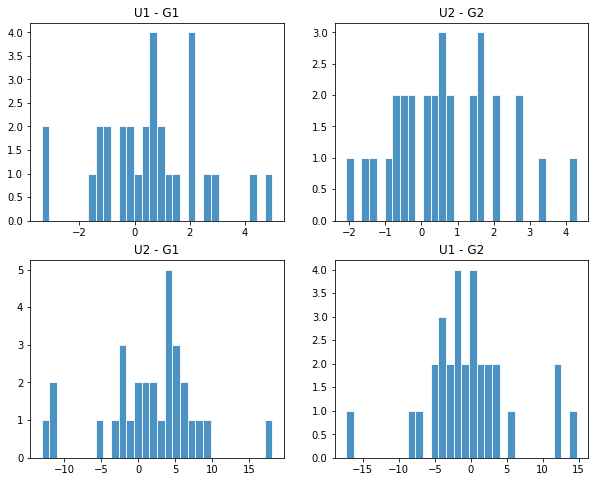

In [132]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(first_adj_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('U1 - G1')
ax[0][1].hist(second_adj_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('U2 - G2')
ax[1][0].hist(lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('U2 - G1')
ax[1][1].hist(second_class_lstm,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('U1 - G2')